In [1]:
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# load model dan data test prabowo
file1_prabowo = 'model/valid/test/prabowo_model_new.pkl'
model_prabowo = joblib.load(file1_prabowo)

# load data test
file2_prabowo = 'model/valid/test/X_test_tf_prabowo.pkl'
X_test_tf_prabowo = joblib.load(file2_prabowo)

# load data test y
file3_prabowo = 'model/valid/test/y_test_prabowo.pkl'
y_test_prabowo = joblib.load(file3_prabowo)

In [3]:
# load model dan data test ganjar
file1_ganjar = 'model/valid/ganjar/ganjar_model_valid__acc82%.pkl'
model_ganjar = joblib.load(file1_ganjar)

# load data test
file2_ganjar = 'model/valid/ganjar/X_test_tf_ganjar.pkl'
X_test_tf_ganjar = joblib.load(file2_ganjar)

# load data test y
file3_ganjar = 'model/valid/ganjar/y_test_ganjar.pkl'
y_test_ganjar = joblib.load(file3_ganjar)

In [4]:
# load model dan data test anies
file1_anies = 'model/valid/anies/anies_model_acc_82%.pkl'
model_anies = joblib.load(file1_anies)

# load data test
file2_anies = 'model/valid/anies/X_test_tf_anies.pkl'
X_test_tf_anies = joblib.load(file2_anies)

# load data test y
file3_anies = 'model/valid/anies/y_test_anies.pkl'
y_test_anies = joblib.load(file3_anies)

In [7]:
# confusion matrix model anies
result_anies = model_anies.predict(X_test_tf_anies)
result_anies
con_mat_anies =  confusion_matrix(y_test_anies, result_anies)
con_mat_anies
print(classification_report(y_test_anies, result_anies))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        65
           1       0.72      0.83      0.77        52
           2       0.86      0.81      0.83        93

    accuracy                           0.82       210
   macro avg       0.81      0.82      0.81       210
weighted avg       0.82      0.82      0.82       210



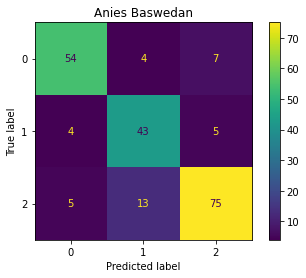

In [6]:
# display hasil dari confusion matrix anies
disp_anies = ConfusionMatrixDisplay(confusion_matrix=con_mat_anies,
                              display_labels=model_anies.classes_)
disp_anies.plot()
plt.title('Anies Baswedan')
plt.show()

In [9]:
# confusion matrix model anies
result_ganjar = model_ganjar.predict(X_test_tf_ganjar)
result_ganjar
con_mat_ganjar =  confusion_matrix(y_test_ganjar, result_ganjar)
con_mat_ganjar
print(classification_report(y_test_ganjar, result_ganjar))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        65
           1       0.68      0.87      0.76        52
           2       0.89      0.88      0.89        93

    accuracy                           0.82       210
   macro avg       0.82      0.82      0.81       210
weighted avg       0.84      0.82      0.82       210



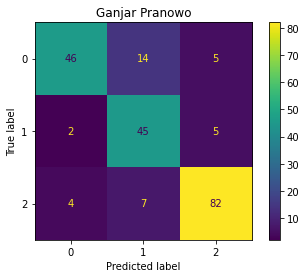

In [10]:
# display hasil dari confusion matrix ganjar
disp_ganjar = ConfusionMatrixDisplay(confusion_matrix=con_mat_ganjar,
                              display_labels=model_ganjar.classes_)
disp_ganjar.plot()
plt.title('Ganjar Pranowo')
plt.show()

In [11]:
# prabowo model predict
result_prabowo = model_prabowo.predict(X_test_tf_prabowo)
result_prabowo
con_mat_prabowo =  confusion_matrix(y_test_prabowo, result_prabowo)
con_mat_prabowo
print(classification_report(y_test_prabowo, result_prabowo))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        65
           1       0.68      0.75      0.72        52
           2       0.86      0.81      0.83        93

    accuracy                           0.79       210
   macro avg       0.78      0.79      0.78       210
weighted avg       0.80      0.79      0.79       210



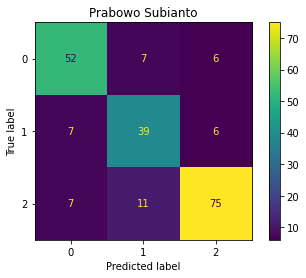

In [12]:
# display hasil dari confusion matrix prabowo
disp_prabowo = ConfusionMatrixDisplay(confusion_matrix=con_mat_prabowo,
                              display_labels=model_prabowo.classes_)
disp_prabowo.plot()
plt.title('Prabowo Subianto')
plt.show()

# Mencari nilai preference value

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
def decodeLabel(polaritas):
    if polaritas == 2:
        return 'Positif'
    elif polaritas == 1:
        return 'Netral'
    else:
        return 'Negatif'

In [15]:
# instansiasi objek TFIDF
vectorizer = TfidfVectorizer(analyzer='word', max_features=300, max_df=0.5, use_idf=True, norm='l2')

In [16]:
# open data yang akan diprediksi yang sudah melalui praproses
data_anies = pd.read_csv('model/dataset-nolabel/clean/@anies_clean_1k.csv')
data_anies
y_test_anies = data_anies['tweet_tokens_stemmed']
tfidf_predict_anies = vectorizer.fit_transform(y_test_anies)

# open data yang akan diprediksi yang sudah melalui praproses
data_ganjar = pd.read_csv('model/dataset-nolabel/clean/@ganjar_clean_1k.csv')
data_ganjar
y_test_ganjar = data_ganjar['tweet_tokens_stemmed']
tfidf_predict_ganjar = vectorizer.fit_transform(y_test_ganjar)

# open data yang akan diprediksi yang sudah melalui praproses
# prabowo
data_prabowo = pd.read_csv('model/dataset-nolabel/clean/@prabowo_clean_1k.csv')
data_prabowo
y_test_prabowo = data_prabowo['tweet_tokens_stemmed']
tfidf_predict_prabowo = vectorizer.fit_transform(y_test_prabowo)

In [17]:
# prediksi sentimen berdasarkan model yang telah dibangun
prediksi_anies = model_anies.predict(tfidf_predict_anies)
prediksi_anies

# prediksi sentimen berdasarkan model yang telah dibangun
prediksi_ganjar = model_ganjar.predict(tfidf_predict_ganjar)
prediksi_ganjar

# prediksi sentimen berdasarkan model yang telah dibangun
prediksi_prabowo = model_prabowo.predict(tfidf_predict_prabowo)
prediksi_prabowo

array([0, 0, 2, ..., 1, 2, 1])

In [18]:
# inisialisasi data frame dari hasil prediksi
hasil_anies = pd.DataFrame({'Tweet':y_test_anies,'prediksi_test': prediksi_anies})
hasil_anies['Sentimen'] = hasil_anies['prediksi_test'].apply(decodeLabel) 
hasil_anies['tweet_cleaning'] = data_anies['tweet_cleaning']
# hasil_anies.to_csv('model/dataset-nolabel/prediksi/prediksi_anies.csv')
hasil_anies


Tweet  prediksi_test  \
0     ['mahar', 'del', 'btp', 'jakobwolf', 'silalahi...              2   
1     ['gubernur', 'aparat', 'perintah', 'dki', 'mal...              2   
2                                             ['sahsa']              1   
3                                       ['gym', 'oper']              1   
4       ['jakarta', 'banjir', 'pimpin', 'air', 'antri']              0   
...                                                 ...            ...   
997   ['nakula', 'sauya', 'kadrun', 'demo', 'kena', ...              0   
998   ['sajak', 'habis', 'kilaf', 'khilafah', 'berab...              0   
999   ['amin', 'saya', 'doa', 'capres', 'usung', 'pi...              1   
1000  ['gallo', 'tv', 'marm', 'idha', 'rumah', 'mu',...              1   
1001                            ['baik', 'pake', 'toa']              1   

     Sentimen                                     tweet_cleaning  
0     Positif  MAHARAN del  yah btp JaKoBWolF Silalahi Asmara...  
1     Positif  Bapak Gubernur dan aparat pemerintah DKI Malam...  
2      Netral                                              Sahsa  
3      Netral                                           Gym oper  
4     Negatif  Woy mana ada Jakarta banjir setelah dipimpin p...  
...       ...                                                ...  
997   Negatif   nakula sauya Setiap kadrun demo nggak di kena...  
998   Negatif  sajak Habisnya mereka seringkali kilaf sih kal...  
999    Netral  Amin  sayapun di  ikut mendoakan capres yg diu...  
1000   Netral  gallo TV MarM idha Rumah mu dimana biar mengel...  
1001   Netral                       Yang terbaik karena pake TOA  

[1002 rows x 4 columns]

In [19]:
# inisialisasi data frame dari hasil prediksi ganjar
hasil_ganjar = pd.DataFrame({'Tweet':y_test_ganjar,'prediksi_test': prediksi_ganjar})
hasil_ganjar['Sentimen'] = hasil_ganjar['prediksi_test'].apply(decodeLabel) 
hasil_ganjar['tweet_cleaning'] = data_ganjar['tweet_cleaning']
# hasil_ganjar.to_csv('model/dataset-nolabel/prediksi/prediksi-ganjar.csv')
hasil_ganjar


Tweet  prediksi_test  \
0     ['sahabat', 'kerja', 'cat', 'patok', 'arah', '...              1   
1     ['bangga', 'warga', 'jember', 'dukung', 'ganjar']              0   
2                                   ['amin', 'laksana']              2   
3           ['dijelasin', 'gugel', 'gebleknur', 'budu']              1   
4                                            ['senang']              2   
...                                                 ...            ...   
1014  ['nz', 'ws', 'wayahe', 'terima', 'estafet', 'j...              1   
1015  ['palu', 'lagu', 'lagu', 'nasional', 'kenal', ...              2   
1016                                ['banten', 'gerak']              2   
1017                                      ['kasimannn']              1   
1018       ['jozzz', 'anakanak', 'tanam', 'nasionalis']              0   

     Sentimen                                     tweet_cleaning  
0      Netral  Sahabat Pekerjaan Pengecatan Patok Pengarah Pe...  
1     Negatif  ikut bangga Warga jember pun mendukung Pak Ganjar  
2     Positif                      amin semoga segera terlaksana  
3      Netral  II Kan dah dijelasin di Gugel gebleknur paling...  
4     Positif                          Alhamdulillah ikut senang  
...       ...                                                ...  
1014   Netral          NZ Ws wayahe menerima estafet pak jokowi   
1015  Positif  Memalui lagu lagu nasional kita mengenalkan ci...  
1016  Positif                                   Banten bergerak   
1017   Netral                                         Kasimannn   
1018  Negatif  Jozzz Anakanak harus ditanamkan nasionalis sej...  

[1019 rows x 4 columns]

In [18]:
# inisialisasi data frame dari hasil prediksi
hasil_prabowo = pd.DataFrame({'Tweet':y_test_prabowo,'prediksi_test': prediksi_prabowo})
hasil_prabowo['Sentimen'] = hasil_prabowo['prediksi_test'].apply(decodeLabel) 
hasil_prabowo['tweet_cleaning'] = data_prabowo['tweet_cleaning']
# hasil_prabowo.to_csv('model/dataset-nolabel/prediksi/prediksi_prabowo.csv')
hasil_prabowo


Tweet  prediksi_test  \
0     ['nakula', 'rata', 'thn', 'puas', 'perintah', ...              0   
1     ['bani', 'cari', 'ceper', 'jelang', 'pilpres',...              0   
2                                              ['tuju']              2   
3                                   ['waketum', 'ajak']              1   
4             ['jebmen', 'tiati', 'mending', 'bungkem']              0   
...                                                 ...            ...   
1005  ['lsn', 'mayoritas', 'nahdliyin', 'paling', 'd...              2   
1006  ['riau', 'doa', 'sehat', 'prabowo', 'jokowi', ...              2   
1007  ['gerindra', 'sehat', 'prabowo', 'jokowi', 'pr...              1   
1008  ['banding', 'tokoh', 'mampu', 'prabowo', 'komp...              2   
1009  ['banding', 'capres', 'alam', 'menhan', 'prabo...              1   

     Sentimen                                     tweet_cleaning  
0     Negatif  nakula Bila dirata setiap thn yg kurang amp td...  
1     Negatif  Bani Pe  lagi Cari Ceperan ke Pak menjelang Pi...  
2     Positif                                             Setuju  
3      Netral                                Waketum  gak diajak  
4     Negatif  masa mau di jebmen  Tiati pak mending bungkem ...  
...       ...                                                ...  
1005  Positif  Bos Update nih menurut LSN mayoritas nahdliyin...  
1006  Positif  Riau Kami berdoa sehat selalu Bapak Prabowo Jo...  
1007   Netral  gerindra Semoga sehat selalu Pak Prabowo Jokow...  
1008  Positif  Kita tahu dibandingkan tokoh yang lain kemampu...  
1009   Netral  emang betul dibandingkan capres yang lain peng...  

[1010 rows x 4 columns]

Sentimen
Negatif    28.343313
Netral     36.526946
Positif    35.129741
dtype: float64


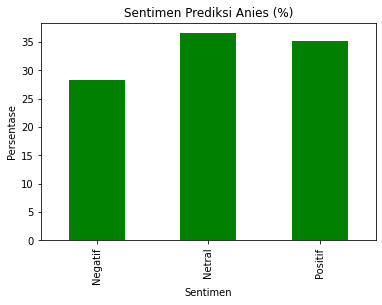

In [19]:
# persentase anies
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.title('Sentimen Prediksi Anies (%)')
persentase_anies = (hasil_anies.groupby('Sentimen').size()/hasil_anies['Sentimen'].count())*100
persentase_anies.plot(kind = 'bar',
        color = 'green')
print(persentase_anies)
plt.show()

Sentimen
Negatif    26.692836
Netral     45.044161
Positif    28.263003
dtype: float64


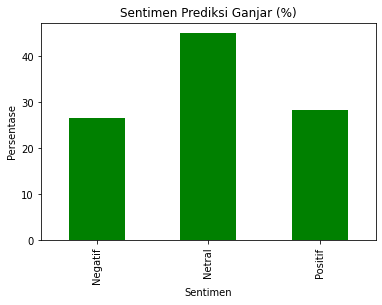

In [21]:
# persentase ganjat pranowo
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.title('Sentimen Prediksi Ganjar (%)')
persentase_ganjar = (hasil_ganjar.groupby('Sentimen').size()/hasil_ganjar['Sentimen'].count())*100
persentase_ganjar.plot(kind = 'bar',
        color = 'green')
print(persentase_ganjar)
plt.show()

Sentimen
Negatif    29.504950
Netral     31.188119
Positif    39.306931
dtype: float64


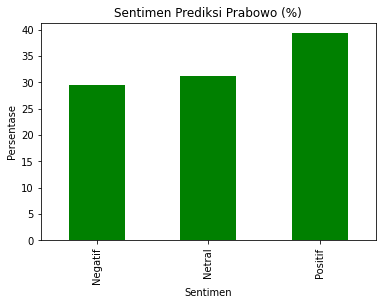

In [22]:
# persentase prabowo
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.title('Sentimen Prediksi Prabowo (%)')
persentase_prabowo = (hasil_prabowo.groupby('Sentimen').size()/hasil_prabowo['Sentimen'].count())*100
persentase_prabowo.plot(kind = 'bar',
        color = 'green')
print(persentase_prabowo)
plt.show()

In [23]:
# anies
positif_anies = hasil_anies.value_counts('Sentimen').Positif
netral_anies = hasil_anies.value_counts('Sentimen').Netral
negatif_anies = hasil_anies.value_counts('Sentimen').Negatif

# ganjar
positif_ganjar = hasil_ganjar.value_counts('Sentimen').Positif
netral_ganjar = hasil_ganjar.value_counts('Sentimen').Netral
negatif_ganjar = hasil_ganjar.value_counts('Sentimen').Negatif


# prabowo
positif_prabowo = hasil_prabowo.value_counts('Sentimen').Positif
netral_prabowo = hasil_prabowo.value_counts('Sentimen').Netral
negatif_prabowo = hasil_prabowo.value_counts('Sentimen').Negatif

# pref value
pref_values_anies = positif_anies/(positif_anies+netral_anies+negatif_anies) * 82/100
pref_values_ganjar = positif_ganjar/(positif_ganjar+netral_ganjar+negatif_ganjar) * 82/100
pref_values_prabowo = positif_prabowo/(positif_prabowo+netral_prabowo+negatif_prabowo) * 79/100

print(pref_values_anies)
print(pref_values_ganjar)
print(pref_values_prabowo)

0.288063872255489
0.23175662414131504
0.3105247524752475


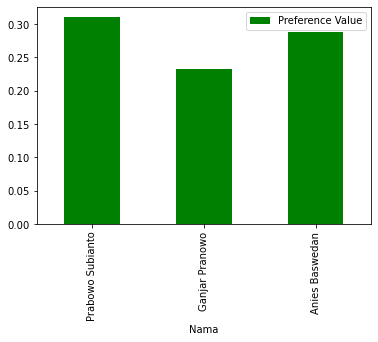

Nama  Preference Value
0  Prabowo Subianto          0.310525
1    Ganjar Pranowo          0.231757
2    Anies Baswedan          0.288064

In [24]:
data={'Nama':['Prabowo Subianto','Ganjar Pranowo','Anies Baswedan'],'Preference Value':[pref_values_prabowo,
                                                                                        pref_values_ganjar,pref_values_anies]}
df_pref = pd.DataFrame(data)
df_pref.plot(kind = 'bar',
        x = 'Nama',
        y = 'Preference Value',
        color = 'green')
plt.show()
df_pref